f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
Определить корни.
Найти интервалы, на которых функция возрастает.
Найти интервалы, на которых функция убывает.
Построить график.
Вычислить вершину.
Определить промежутки, на котором f > 0.
Определить промежутки, на котором f < 0.

In [33]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [34]:
x = sp.symbols('x')
f = sp.simplify('-12*x^4*sin(cos(x)) - 18*x^3+5*x^2 + 10*x - 30')
f

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

In [35]:
begint = -11 # начало интервала
endint = 11 # конец интервала
accuracy = 0.000001 # точность вычислений
step = 0.001

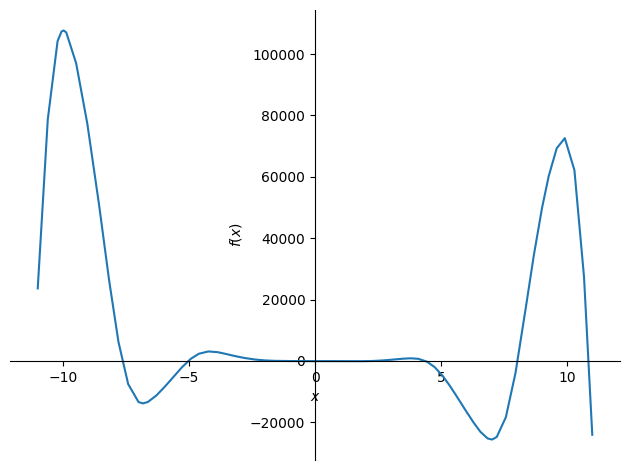

In [36]:
sp.plot(f, (x, begint, endint))

In [37]:
xlist = []
ylist = []
i = begint
xlist.append(i)
ylist.append(f.evalf(subs={x: i}))
while i < endint + step:
    if f.evalf(subs={x: i}) * f.evalf(subs={x: i+step}) <= 0:
        beg = i
        while beg < i + step + accuracy:
            if f.evalf(subs={x: beg}) * f.evalf(subs={x: beg+step}) <= 0:
                xlist.append(beg)
                ylist.append(f.evalf(subs={x: beg}))
                break
            beg += accuracy
    elif f.evalf(subs={x: i}) > f.evalf(subs={x: i+step}) and f.evalf(subs={x: i}) > f.evalf(subs={x: i-step}):
        xlist.append(i)
        ylist.append(f.evalf(subs={x: i}))
    elif f.evalf(subs={x: i}) < f.evalf(subs={x: i+step}) and f.evalf(subs={x: i}) < f.evalf(subs={x: i-step}):
        xlist.append(i)
        ylist.append(f.evalf(subs={x: i}))
    i += step
xlist.append(endint)
ylist.append(f.evalf(subs={x: endint}))
print('x', xlist)
print('y', ylist)

x [-11, -9.979000000000566, -7.651000000001546, -6.831000000001272, -5.02700000000067, -4.168000000000383, -1.33900000000062, -0.3930000000006567, 0.454999999999344, 1.7009999999992673, 2.2729999999992043, 3.818999999999034, 4.382999999999142, 7.001000000000016, 8.03500000000033, 9.87699999999931, 10.859999999998765, 11]
y [23645.4428073991, 107678.041523442, 14.4939350097271, -13820.5331345523, -0.991142930434794, 3111.36308859180, 0.00368698862847144, -32.2935780487257, -26.5127277811490, -74.1062684986109, -0.0163901158726754, 872.255604452489, 1.92437166728046, -25610.5096636916, -8.11978244878397, 72634.6629971373, 105.230829969917, -24050.5571926009]


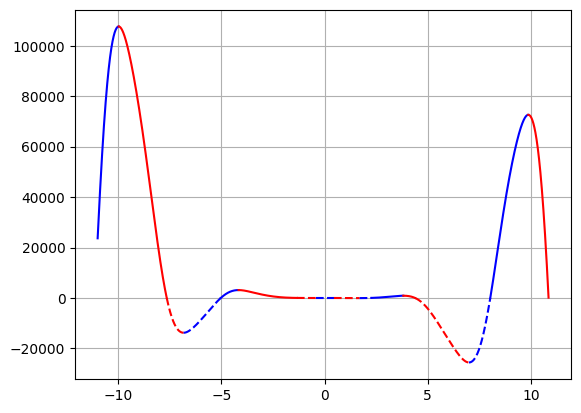

In [38]:
for i in range(len(xlist) - 2):
    xl = np.arange(xlist[i], xlist[i + 1] + step, step)
    if f.evalf(subs={x: (xlist[i] + xlist[i + 1]) /2 }) > 0:
        line = '-'
    else:
        line = '--'
    if ylist[i] > ylist[i + 1]:
        color = 'red'
    else:
        color = 'blue'
    plt.rcParams['lines.linestyle'] = line
    yl = [f.evalf(subs={x: j}) for j in xl]
    plt.plot(xl, yl, color)

plt.grid()
plt.show()